# Part One: Work Plan

## Project Introduction: 

Forecasting Client Churn for Interconnec

Overview

Interconnect, a leading telecom operator, aims to enhance its customer retention strategies by forecasting client churn. By identifying users who are likely to leave, Interconnect can proactively offer promotional codes and special plan options to retain them. To achieve this, the marketing team has gathered extensive data on their clientele, including personal information, plan details, and contract specifics.

Services Provided by Interconnect

Interconnect offers a range of services, primarily focusing on:

- **Landline Communication**: Multiple simultaneous connections.
- **Internet Services**: Available via DSL (Digital Subscriber Line) or fiber optic cable.

Additionally, Interconnect provides:

- **Internet Security**: Antivirus software (DeviceProtection) and a malicious website blocker (OnlineSafety).
- **Technical Support**: A dedicated support line (TechSupport).
- **Cloud Services**: File storage and data backup (OnlineBackup).
- **Entertainment**: TV streaming (StreamingTV) and a movie directory (StreamingMovies).

Clients have the flexibility to choose between monthly payments or 1- or 2-year contracts, with various payment methods and electronic invoicing options.

Data Description

The dataset comprises several files sourced from different areas:

- **contract.csv**: Contract information.
- **personal.csv**: Client personal data.
- **internet.csv**: Internet service details.
- **phone.csv**: Telephone service details.

Each file includes a `customerID` column, providing a unique identifier for each client. The contract data is current as of February.

Project Goals and Metrics

The primary goal is to predict client churn, with the target feature being the `end_date` column marked as ‘No’. The main evaluation metric is AUC-ROC, with accuracy as an additional metric.

## Importing Libraries and Loading Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, LGBMRegressor

In [7]:
pd.set_option('display.max_columns', 200)

In [8]:
try:
    contract_data = pd.read_csv('/datasets/final_provider/contract.csv')
    personal_data = pd.read_csv('/datasets/final_provider/personal.csv')
    internet_data = pd.read_csv('/datasets/final_provider/internet.csv')
    phone_data = pd.read_csv('/datasets/final_provider/phone.csv')
    # Display a message indicating the location of the found files.
    print("TripleTen")
    
except:
    try:
        contract_data = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/contract.csv")
        personal_data = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/personal.csv")
        internet_data = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/internet.csv")
        phone_data = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/phone.csv")
        # Display a message indicating the location of the found files.
        print("Files found on main pc drive")

    except :
        contract_data = pd.read_csv(r"C:/Users/Jay/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/contract.csv")
        personal_data = pd.read_csv(r"C:/Users/Jay/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/personal.csv")
        internet_data = pd.read_csv(r"C:/Users/Jay/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/internet.csv")
        phone_data = pd.read_csv(r"C:/Users/Jay/OneDrive/my_documents/vs_code/TripleTen/Sprint_Final/datasets/final_provider/phone.csv")
        # Display a message indicating the location of the found files.
        print("Files found on laptop drive")
    

Files found on main pc drive


## Data Preporcessing

Data Examination and Preparation

To ensure the integrity and usability of our data, we will conduct a thorough examination of each dataset individually. This process involves:

1. **Establishing Correct Data Types**: Ensuring that each column in the datasets has the appropriate data type for accurate analysis.
2. **Identifying Opportunities for Feature Engineering**: Looking for ways to create new features that could enhance our predictive models.
3. **Addressing Missing or Duplicated Data**: Identifying and handling any gaps or redundancies in the data to maintain consistency and reliability.

We have a total of four datasets to work with:

- **contract_data**: Contains information about client contracts.
- **personal_data**: Includes personal details of the clients.
- **internet_data**: Details regarding the internet services used by clients.
- **phone_data**: Information about the telephone services subscribed to by clients.

By meticulously preparing each dataset, we can ensure a robust foundation for our subsequent analysis and modeling efforts.

### Functions

Below are some basic functions to quickly obtain essential information and streamline our data analysis process:

In [13]:
def camel_to_snake(name):
    """ Function to convert camelCase or mixedCase to snake_case """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()


In [14]:
def print_info(dataset):
    """ This function prints basic info on the dataset"""
    print(dataset.info())
    print()
    print(dataset.describe())

In [15]:
def check_null_and_duplicates(dataset):
    """ Checks for nulls and duplicates"""
    
    # This will return True if there are any null values in the DataFrame
    has_nulls = dataset.isnull().values.any()
    print(f'\nHas Nulls: {has_nulls}')
    print(f'Duplicates: {dataset.duplicated().sum()}')
    print('Null Values:')
    null_counts = dataset.isnull().sum()
    print(null_counts)

In [16]:
def binary_encoding(columns, df):
    """
    Encodes specified columns in the DataFrame into binary categories.

    Parameters:
    columns (list): List of column names to be encoded.
    df (DataFrame): The DataFrame containing the columns to be encoded.
    """
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
        print(f"Column: {column.title()} | Dtype: {df[column].dtype}")

In [17]:
def bool_to_int(columns, df):
    """ Converts columns from bool to int"""
    for column in columns:
        df[column] = df[column].astype(int)

In [18]:
dataset = {
    'contract_data': contract_data,
    'personal_data': personal_data,
    'internet_data': internet_data,
    'phone_data': phone_data
}

In [19]:
for name, sets in dataset.items():
    #print(f'\nDataset: {name.title()}')
    sets.columns = [camel_to_snake(col) for col in sets.columns]
    # check_null_and_duplicates(sets)
    # print('-------------------')

### Contract Data

Dataset Overview

This dataset contains information about customers of a telecom operator, including their contract details, billing information, and service usage. The columns are as follows:

- **customerID**: Unique identifier for each customer.
- **begin_date**: The start date of the customer’s contract.
- **end_date**: The end date of the customer’s contract or ‘No’ if the contract is still active.
- **Type**: The type of contract (e.g., Month-to-month, One year, Two year).
- **PaperlessBilling**: Indicates whether the customer has opted for paperless billing.
- **PaymentMethod**: The method used by the customer to make payments (e.g., Mailed check, Electronic check, Credit card).
- **MonthlyCharges**: The monthly charges incurred by the customer.
- **total_charges**: The total charges incurred by the customer over the duration of their contract.

Possible Feature Engineering

- **Convert Dates to Datetime**: Convert `begin_date` and `end_date` to datetime format to enable date-related calculations.
- **Calculate Contract Duration**: Create a new feature that calculates the duration of the contract in months or days.
- **Binary Encoding**: Convert categorical variables like `PaperlessBilling` and `Type` into binary or one-hot encoded features.
- **Payment Method Encoding**: Encode `PaymentMethod` using one-hot encoding or label encoding to convert it into numerical format.
- **Monthly Charges Binning**: Create bins for `MonthlyCharges` to categorize customers into different spending groups.
- **Total Charges per Month**: Calculate the average monthly charges by dividing `total_charges` by the contract duration.
- **Contract Status**: Create a binary feature indicating whether the contract is active or terminated based on the `end_date`.
- **Interaction Features**: Create interaction features between `MonthlyCharges` and `Type` or `PaymentMethod` to capture combined effects.

These engineered features can provide additional insights and improve the predictive accuracy of your model.
 or assistance with any specific aspect!

In [22]:
contract_data.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
6676,5274-XHAKY,2016-09-01,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.6
412,5233-AOZUF,2017-09-01,No,Month-to-month,Yes,Electronic check,74.95,2149.05
3444,3739-YBWAB,2017-02-01,No,One year,No,Mailed check,35.35,1317.95
408,4800-VHZKI,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Mailed check,19.90,19.9
3969,2920-RNCEZ,2020-01-01,No,Month-to-month,Yes,Credit card (automatic),69.95,69.95


In [23]:
print_info(contract_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

       monthly_charges
count      7043.000000
mean         64.761692
std          30.090047
min          18.250000
25%          35.500000
50%          70.350000
75%          89.850000
max         118.750000


In [24]:
check_null_and_duplicates(contract_data)


Has Nulls: False
Duplicates: 0
Null Values:
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


In [25]:
contract_data = contract_data.dropna(subset=['total_charges'])
check_null_and_duplicates(contract_data)


Has Nulls: False
Duplicates: 0
Null Values:
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


#### Convert Dates to Datetime

Observations | Data types:

Upon initial inspection, it is evident that the `begin_date` and `end_date` columns are of the object data type. These columns should be converted to the datetime format. Additionally, the `total_charges` column is currently an object data type, which suggests it may contain non-numeric values or needs conversion to a numeric type for analysis. It should be converted to float64 to facilitate any necessary calculations in the future.

In [28]:
# Convert 'begin_date' and 'end_date' to datetime
contract_data['begin_date'] = pd.to_datetime(contract_data['begin_date'])
contract_data['end_date'] = pd.to_datetime(contract_data['end_date'], errors='coerce')

# Convert 'total_charges' to float64
# First, ensure there are no non-numeric values in the column
contract_data['total_charges'] = pd.to_numeric(contract_data['total_charges'], errors='coerce')

# Then, convert the column to float64
contract_data['total_charges'] = contract_data['total_charges'].astype('float64')

# Printing info to comfirm change
contract_data.dtypes

C:\Users\alejo\AppData\Local\Temp\ipykernel_18960\693594507.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract_data['end_date'] = pd.to_datetime(contract_data['end_date'], errors='coerce')


customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
dtype: object

We believe that the 5174 null in the `end_date` column are active user however we have 11 nulls on the `total_charges`, we will drop those. 

In [30]:
begining = contract_data['begin_date'].min()

In [31]:
end = contract_data['end_date'].max()

In [32]:
data_date_range = end - begining
data_date_range

Timedelta('2283 days 00:00:00')

#### Calculate Contract Duration

In [34]:
# Calculate the timedelta in days
# contract_data['contract_duration'] = contract_data['end_date'] - contract_data['begin_date']
contract_data['contract_duration_days'] = (contract_data['end_date'] - contract_data['begin_date']).dt.days

# Convert the duration to months
contract_data['contract_duration_months'] = contract_data['contract_duration_days'] / 30.44



contract_data['contract_duration'] = contract_data['end_date'] - contract_data['begin_date']

contract_data['contract_duration_months'] = contract_data['contract_duration_months'].round()

# Reorganize columns
new_order = ['customer_id', 'begin_date', 'end_date','contract_duration_days', 'contract_duration_months', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',]

contract_data = contract_data[new_order]

This snipet of code created a new column called `contract_duration_days` and `contract_duration_months` that provides the contract duration in days and months.

#### Payment Method Encoding

In [37]:
contract_data.columns

Index(['customer_id', 'begin_date', 'end_date', 'contract_duration_days',
       'contract_duration_months', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [38]:
contract_data = pd.get_dummies(contract_data, columns=['type','payment_method'])

In [39]:
# Rename the column
contract_data.rename(columns={
    'payment_method_Bank transfer (automatic)': 'payment_method_transfer',
    'payment_method_Credit card (automatic)': 'payment_method_credit',
    'payment_method_Electronic check': 'payment_method_check',
    'payment_method_Mailed check': 'payment_method_mail',
    'type_Month-to-month': 'type_monthly',
    'type_One year': 'type_one_year',
       'type_Two year': 'type_two_year'
}, inplace=True)

In [40]:
list = ['type_monthly', 'type_one_year', 'type_two_year',
       'payment_method_transfer', 'payment_method_credit',
       'payment_method_check', 'payment_method_mail']

In [41]:
bool_to_int(list,contract_data)

Here's a simple explanation of what's happening in your code:

1. **One-Hot Encoding the `payment_method` Column**:
    - This line converts the `payment_method` column into multiple binary (0 or 1) columns, one for each unique value in the original column. Each new column indicates whether a particular payment method was used.

2. **Renaming Columns**:
    - This block renames the newly created columns from their original, more detailed names (like `payment_method_Bank transfer (automatic)`) to shorter, simpler names (like `payment_method_transfer`).

3. **Converting Boolean Columns to Integer (0 and 1)**:
    - Here, we define a list of the renamed column names.
    - Then, for each column in the list, the code converts the data type from boolean (`True`/`False`) to integers (`1`/`0`). This is done because pandas' one-hot encoding creates boolean columns by default, and this step ensures that they are represented as integers instead.

In summary, the code transforms a categorical `payment_method` column into several binary columns (one for each payment method), renames those columns for simplicity, and then converts the data type of these columns from boolean to integer.

#### Label Encoding

Label encoding will assign a unique integer to each unique value in the `paperless_billing` column.

In [45]:
paperless_billing = ['paperless_billing']

binary_encoding(paperless_billing, contract_data)

Column: Paperless_Billing | Dtype: int32


In [46]:
# double checkin our work
contract_data.dtypes

customer_id                         object
begin_date                  datetime64[ns]
end_date                    datetime64[ns]
contract_duration_days             float64
contract_duration_months           float64
paperless_billing                    int32
monthly_charges                    float64
total_charges                      float64
type_monthly                         int32
type_one_year                        int32
type_two_year                        int32
payment_method_transfer              int32
payment_method_credit                int32
payment_method_check                 int32
payment_method_mail                  int32
dtype: object

### Personal Data

In [48]:
personal_data.sample(5)

,customer_id,gender,senior_citizen,partner,dependents
3050,0876-WDUUZ,Female,0,No,No
1880,6474-FVJLC,Male,0,No,No
4252,5939-XAIXZ,Female,0,No,No
276,4484-GLZOU,Female,0,Yes,No
4995,7912-SYRQT,Female,0,No,No


In [49]:
print_info(personal_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

       senior_citizen
count     7043.000000
mean         0.162147
std          0.368612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000


In [50]:
check_null_and_duplicates(personal_data)


Has Nulls: False
Duplicates: 0
Null Values:
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64


After a thorough review of the dataset, our initial approach will focus on encoding categorical variables such as `gender`, `partner`, and `dependents`. Specifically, `gender` will be encoded as `0` for Female and `1` for Male. Similarly, binary categorical variables like `partner` and `dependents` will be encoded using binary values (e.g., `Yes` = 1, `No` = 0). It is important to note that the dataset contains no duplicates or missing values, ensuring data integrity and consistency for further analysis.

In [52]:
personal_data_list = ['gender', 'partner', 'dependents']

binary_encoding(personal_data_list, personal_data)

Column: Gender | Dtype: int32
Column: Partner | Dtype: int32
Column: Dependents | Dtype: int32


In [53]:
personal_data.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,1,0,0,0
2,3668-QPYBK,1,0,0,0
3,7795-CFOCW,1,0,0,0
4,9237-HQITU,0,0,0,0


The `personal_data` data frame seems pretty clean and ready to use with no further changes needed. No duplicates of null values found in the dataset. 

### Internet Data

In [56]:
internet_data.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [57]:
print_info(internet_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

       customer_id internet_service online_security online_backup  \
count         5517             5517            5517          5517   
unique        5517                2               2             2   
top     7590-VHVEG      Fiber optic              No            No   
freq             1             3096            3498          3088   

       device_protection tech_

In [58]:
check_null_and_duplicates(internet_data)


Has Nulls: False
Duplicates: 0
Null Values:
customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64


In [59]:
internet_data = pd.get_dummies(internet_data, columns=['internet_service'], prefix='internet')

In [60]:
internet_data.rename(columns={
    'internet_DSL': 'internet_dsl',
    'internet_Fiber optic': 'internet_fiber'
}, inplace=True)

In [61]:
internet_services = ['internet_dsl','internet_fiber']

bool_to_int(internet_services, internet_data)

In [62]:
internet_data.dtypes

customer_id          object
online_security      object
online_backup        object
device_protection    object
tech_support         object
streaming_tv         object
streaming_movies     object
internet_dsl          int32
internet_fiber        int32
dtype: object

In [63]:
internet_list = ['online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies']

binary_encoding(internet_list, internet_data)

Column: Online_Security | Dtype: int32
Column: Online_Backup | Dtype: int32
Column: Device_Protection | Dtype: int32
Column: Tech_Support | Dtype: int32
Column: Streaming_Tv | Dtype: int32
Column: Streaming_Movies | Dtype: int32


In [64]:
internet_data.head()

,customer_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber
0,7590-VHVEG,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,1,0,0,0,1,0
2,3668-QPYBK,1,1,0,0,0,0,1,0
3,7795-CFOCW,1,0,1,1,0,0,1,0
4,9237-HQITU,0,0,0,0,0,0,0,1


We have successfully converted the columns `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, and `streaming_movies` into binary categories. Upon thorough examination, the internet data appears to be exceptionally clean, with no duplicates or missing values detected. Consequently, no additional preprocessing steps are required for this dataset.


### Phone Data

In [67]:
phone_data.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [68]:
print_info(phone_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

       customer_id multiple_lines
count         6361           6361
unique        6361              2
top     5575-GNVDE             No
freq             1           3390


In [69]:
check_null_and_duplicates(phone_data)


Has Nulls: False
Duplicates: 0
Null Values:
customer_id       0
multiple_lines    0
dtype: int64


In [70]:
phone_column = ['multiple_lines']
binary_encoding(phone_column, phone_data)

Column: Multiple_Lines | Dtype: int32


We have successfully converted the columns `multiple_lines` into binary categories. Upon thorough examination, the `phone_data` appears to be exceptionally clean, with no duplicates or missing values detected. Consequently, no additional preprocessing steps are required for this dataset.

## Mergin all Datasets

We will be merging all data sets into them on the `customer_id` column.

In [74]:
# Merge datasets on 'customerID'
data = contract_data.merge(personal_data, on='customer_id', how='left')
data = data.merge(internet_data, on='customer_id', how='left')
data = data.merge(phone_data, on='customer_id', how='left')

In [75]:
print_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               7043 non-null   object        
 1   begin_date                7043 non-null   datetime64[ns]
 2   end_date                  1869 non-null   datetime64[ns]
 3   contract_duration_days    1869 non-null   float64       
 4   contract_duration_months  1869 non-null   float64       
 5   paperless_billing         7043 non-null   int32         
 6   monthly_charges           7043 non-null   float64       
 7   total_charges             7032 non-null   float64       
 8   type_monthly              7043 non-null   int32         
 9   type_one_year             7043 non-null   int32         
 10  type_two_year             7043 non-null   int32         
 11  payment_method_transfer   7043 non-null   int32         
 12  payment_method_credi

In [76]:
check_null_and_duplicates(data)


Has Nulls: True
Duplicates: 0
Null Values:
customer_id                    0
begin_date                     0
end_date                    5174
contract_duration_days      5174
contract_duration_months    5174
paperless_billing              0
monthly_charges                0
total_charges                 11
type_monthly                   0
type_one_year                  0
type_two_year                  0
payment_method_transfer        0
payment_method_credit          0
payment_method_check           0
payment_method_mail            0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
online_security             1526
online_backup               1526
device_protection           1526
tech_support                1526
streaming_tv                1526
streaming_movies            1526
internet_dsl                1526
internet_fiber              1526
multiple_lines               682
dtype: int64


In [77]:
data.dropna()

,customer_id,begin_date,end_date,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines
2,3668-QPYBK,2019-10-01,2019-12-01,61.0,2.0,1,53.85,108.15,1,0,0,0,0,0,1,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01,61.0,2.0,1,70.70,151.65,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,9305-CDSKC,2019-03-01,2019-11-01,245.0,8.0,1,99.65,820.50,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
8,7892-POOKP,2017-07-01,2019-11-01,853.0,28.0,1,104.80,3046.05,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
13,0280-XJGEX,2015-09-01,2019-10-01,1491.0,49.0,1,103.70,5036.30,1,0,0,1,0,0,0,1,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01,365.0,12.0,1,59.80,727.80,0,1,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7026,8775-CEBBJ,2019-02-01,2019-11-01,273.0,9.0,1,44.20,403.35,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7032,6894-LFHLY,2019-10-01,2019-11-01,31.0,1.0,1,75.75,75.75,1,0,0,0,0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7034,0639-TSIQW,2014-03-01,2019-10-01,2040.0,67.0,1,102.95,6886.25,1,0,0,0,1,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [78]:
data.describe()

,begin_date,end_date,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines
count,7043,1869,1869.000000,1869.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,6361.000000
mean,2017-04-30 13:01:50.918642688,2019-11-15 21:31:18.009630976,547.352060,17.979133,0.592219,64.761692,2283.300441,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880,0.504756,0.162147,0.483033,0.299588,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.438825,0.561175,0.467065
min,2013-10-01 00:00:00,2019-10-01 00:00:00,30.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-06-01 00:00:00,2019-11-01 00:00:00,61.000000,2.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017-09-01 00:00:00,2019-11-01 00:00:00,304.000000,10.000000,1.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2019-04-01 00:00:00,2019-12-01 00:00:00,883.000000,29.000000,1.000000,89.850000,3794.737500,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2020-02-01 00:00:00,2020-01-01 00:00:00,2191.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,594.389607,19.531123,0.491457,30.090047,2266.771362,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141,0.500013,0.368612,0.499748,0.458110,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.496289,0.496289,0.498953


In [79]:
data['churn'] = data['end_date'].isna().astype(int)

In [80]:
data.head()

,customer_id,begin_date,end_date,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
0,7590-VHVEG,2020-01-01,NaT,NaN,NaN,1,29.85,29.85,1,0,0,0,0,1,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1
1,5575-GNVDE,2017-04-01,NaT,NaN,NaN,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3668-QPYBK,2019-10-01,2019-12-01,61.0,2.0,1,53.85,108.15,1,0,0,0,0,0,1,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,7795-CFOCW,2016-05-01,NaT,NaN,NaN,0,42.30,1840.75,0,1,0,1,0,0,0,1,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,1
4,9237-HQITU,2019-09-01,2019-11-01,61.0,2.0,1,70.70,151.65,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [81]:
unique_customers = data['customer_id'].nunique()
print(f'The number of unique customer_id values is: {unique_customers}')

The number of unique customer_id values is: 7043


In [82]:
data.sort_values(by='end_date', ascending=False)

,customer_id,begin_date,end_date,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
2086,2955-BJZHG,2018-08-01,2020-01-01,518.0,17.0,0,80.85,1400.85,1,0,0,0,0,1,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5565,5087-SUURX,2018-07-01,2020-01-01,549.0,18.0,1,39.05,669.85,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,0
5553,6629-CZTTH,2019-12-01,2020-01-01,31.0,1.0,1,55.70,55.70,1,0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
5547,9611-CTWIH,2019-10-01,2020-01-01,92.0,3.0,1,89.45,240.45,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2277,3571-RFHAR,2014-08-01,2020-01-01,1979.0,65.0,1,109.15,6941.20,1,0,0,0,0,1,0,1,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,2014-02-01,NaT,NaN,NaN,1,21.15,1419.40,0,0,1,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
7038,6840-RESVB,2018-02-01,NaT,NaN,NaN,1,84.80,1990.50,0,1,0,0,0,0,1,1,0,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
7039,2234-XADUH,2014-02-01,NaT,NaN,NaN,1,103.20,7362.90,0,1,0,0,1,0,0,0,0,1,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
7040,4801-JZAZL,2019-03-01,NaT,NaN,NaN,1,29.60,346.45,1,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1


In [83]:
# Drop irrelevant columns for model training
data.drop(columns=['customer_id', 'begin_date', 'end_date'], inplace=True)

In [84]:
data.isna().sum()

contract_duration_days      5174
contract_duration_months    5174
paperless_billing              0
monthly_charges                0
total_charges                 11
type_monthly                   0
type_one_year                  0
type_two_year                  0
payment_method_transfer        0
payment_method_credit          0
payment_method_check           0
payment_method_mail            0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
online_security             1526
online_backup               1526
device_protection           1526
tech_support                1526
streaming_tv                1526
streaming_movies            1526
internet_dsl                1526
internet_fiber              1526
multiple_lines               682
churn                          0
dtype: int64

In [85]:
missing_mask = data[['online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_dsl', 'internet_fiber']].isna().any(axis=1)

In [86]:
# Step 2: Compare rows with missing values against the rest of the dataset
missing_data = data[missing_mask]
non_missing_data = data[~missing_mask]

# Step 3: Statistical comparison
missing_stats = missing_data.describe()
non_missing_stats = non_missing_data.describe()

# Step 4: Correlation analysis (comparing correlations with missing and non-missing data)
missing_corr = missing_data.corr()
non_missing_corr = non_missing_data.corr()

In [87]:
# Print out results to identify any patterns
print("Statistics for rows with missing values:")
missing_stats

Statistics for rows with missing values:


,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
count,113.000000,113.000000,1526.000000,1526.000000,1520.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.000000,1526.000000
mean,250.840708,8.238938,0.292267,21.079194,665.220329,0.343381,0.238532,0.418087,0.217562,0.216907,0.079948,0.485583,0.510485,0.034076,0.483617,0.421363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224115,0.925950
std,423.254199,13.908036,0.454954,2.164221,555.158112,0.474993,0.426326,0.493406,0.412723,0.412274,0.271301,0.499956,0.500054,0.181484,0.499895,0.493939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.417135,0.261938
min,30.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,30.000000,1.000000,0.000000,19.700000,159.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,31.000000,1.000000,0.000000,20.150000,523.675000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
75%,273.000000,9.000000,1.000000,20.900000,1110.050000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
max,1856.000000,61.000000,1.000000,26.900000,2006.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [88]:
print("\nStatistics for rows without missing values:")
non_missing_stats


Statistics for rows without missing values:


,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
count,1756.000000,1756.000000,5517.000000,5517.000000,5512.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,4835.000000,5517.000000
mean,566.432802,18.605923,0.675186,76.844254,2729.505406,0.607395,0.201015,0.191590,0.219685,0.215878,0.406562,0.157876,0.503172,0.197571,0.482871,0.265905,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.438825,0.561175,0.543744,0.681711
std,598.823271,19.676896,0.468348,21.924661,2355.681063,0.488374,0.400796,0.393588,0.414070,0.411467,0.491236,0.364657,0.500035,0.398203,0.499752,0.441854,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.496289,0.496289,0.498134,0.465855
min,30.000000,1.000000,0.000000,23.450000,23.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.500000,2.750000,0.000000,59.950000,586.837500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,306.000000,10.000000,1.000000,79.450000,2139.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,914.000000,30.000000,1.000000,94.450000,4528.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2191.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
print("\nCorrelation matrix for rows with missing values:")
missing_corr


Correlation matrix for rows with missing values:


,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
contract_duration_days,1.000000,0.999999,0.019673,0.320729,0.991542,-0.643267,0.346537,0.574330,0.214456,0.129497,0.074301,-0.287117,0.001726,-0.059560,0.223952,0.141094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363559,NaN
contract_duration_months,0.999999,1.000000,0.019791,0.320803,0.991553,-0.643382,0.346656,0.574357,0.214293,0.129479,0.074247,-0.286946,0.001765,-0.059655,0.223985,0.141096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363677,NaN
paperless_billing,0.019673,0.019791,1.000000,0.072245,0.021796,0.066308,-0.024968,-0.042259,0.045285,0.004403,0.076201,-0.082365,-0.016361,0.022254,-0.004882,-0.002708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072715,-0.049379
monthly_charges,0.320729,0.320803,0.072245,1.000000,0.484485,-0.223832,-0.067180,0.273525,0.108839,0.081971,0.027405,-0.172315,-0.014265,0.071425,0.168470,0.068106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966687,0.092942
total_charges,0.991542,0.991553,0.021796,0.484485,1.000000,-0.622060,-0.041252,0.635419,0.251993,0.211001,-0.064777,-0.347393,-0.019696,0.090574,0.354621,0.138044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497050,0.250880
type_monthly,-0.643267,-0.643382,0.066308,-0.223832,-0.622060,1.000000,-0.404743,-0.612965,-0.163909,-0.162938,0.137937,0.194821,0.001397,-0.044544,-0.318734,-0.200659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.236421,-0.317268
type_one_year,0.346537,0.346656,-0.024968,-0.067180,-0.041252,-0.404743,1.000000,-0.474407,0.036549,-0.011021,0.033444,-0.039232,0.034399,0.030480,0.006041,-0.004285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.064816,0.105428
type_two_year,0.574330,0.574357,-0.042259,0.273525,0.635419,-0.612965,-0.474407,1.000000,0.126212,0.166380,-0.161687,-0.153652,-0.031067,0.016546,0.301619,0.196873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283602,0.214334
payment_method_transfer,0.214456,0.214293,0.045285,0.108839,0.251993,-0.163909,0.036549,0.126212,1.000000,-0.277522,-0.155440,-0.512320,-0.033301,0.049785,0.112635,0.016429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112718,0.039939
payment_method_credit,0.129497,0.129479,0.004403,0.081971,0.211001,-0.162938,-0.011021,0.166380,-0.277522,1.000000,-0.155141,-0.511334,0.006455,0.041374,0.037935,0.004923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083192,0.094183


In [90]:
print("\nCorrelation matrix for rows without missing values:")
non_missing_corr


Correlation matrix for rows without missing values:


,contract_duration_days,contract_duration_months,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines,churn
contract_duration_days,1.000000,0.999999,0.044464,0.406858,0.963410,-0.568359,0.438516,0.358678,0.172461,0.183260,-0.109834,-0.194574,0.053397,0.080145,0.330349,0.101142,0.238573,0.378418,0.339674,0.236168,0.341876,0.348026,-0.135956,0.135956,0.370754,NaN
contract_duration_months,0.999999,1.000000,0.044473,0.406826,0.963403,-0.568343,0.438495,0.358683,0.172481,0.183182,-0.109790,-0.194581,0.053386,0.080152,0.330303,0.101141,0.238593,0.378378,0.339640,0.236149,0.341865,0.347998,-0.135930,0.135930,0.370768,NaN
paperless_billing,0.044464,0.044473,1.000000,0.194882,0.047122,0.117663,-0.046147,-0.099008,-0.034893,-0.018952,0.139913,-0.127473,-0.008760,0.118640,-0.018353,-0.091545,-0.139168,0.005437,-0.023632,-0.088224,0.117895,0.100942,-0.237596,0.237596,0.092494,-0.143228
monthly_charges,0.406858,0.406826,0.194882,1.000000,0.611598,-0.184645,0.062265,0.165708,0.069168,0.052683,0.090680,-0.260143,-0.017076,0.129902,0.165911,-0.015041,0.069118,0.252337,0.321927,0.134233,0.532439,0.525495,-0.755999,0.755999,0.459631,-0.033560
total_charges,0.963410,0.963403,0.047122,0.611598,1.000000,-0.621572,0.233123,0.534382,0.211551,0.211505,-0.194990,-0.216225,0.003522,0.035950,0.368531,0.138261,0.331783,0.431750,0.446978,0.354257,0.430234,0.434399,-0.228664,0.228664,0.419913,0.322310
type_monthly,-0.568359,-0.568343,0.117663,-0.184645,-0.621572,1.000000,-0.623883,-0.605519,-0.190204,-0.221399,0.316333,0.039659,-0.003066,0.123929,-0.279366,-0.210913,-0.390160,-0.308329,-0.384527,-0.438492,-0.257063,-0.263849,-0.185128,0.185128,-0.155025,-0.389986
type_one_year,0.438516,0.438495,-0.046147,0.062265,0.233123,-0.623883,1.000000,-0.244183,0.063763,0.090793,-0.127877,-0.002585,-0.000016,-0.051237,0.105441,0.086105,0.137227,0.121845,0.145038,0.132169,0.097577,0.102065,0.075960,-0.075960,0.028925,0.190292
type_two_year,0.358678,0.358683,-0.099008,0.165708,0.534382,-0.605519,-0.244183,1.000000,0.171079,0.182263,-0.262296,-0.046578,0.003820,-0.101598,0.239273,0.174025,0.344382,0.258507,0.329437,0.409504,0.219607,0.223458,0.152360,-0.152360,0.164371,0.290129
payment_method_transfer,0.172461,0.172481,-0.034893,0.069168,0.211551,-0.190204,0.063763,0.171079,1.000000,-0.278405,-0.439177,-0.229739,-0.011247,-0.025790,0.110177,0.064133,0.113111,0.105285,0.100499,0.120534,0.056321,0.059386,0.030121,-0.030121,0.074785,0.136996
payment_method_credit,0.183260,0.183182,-0.018952,0.052683,0.211505,-0.221399,0.090793,0.182263,-0.278405,1.000000,-0.434298,-0.227186,-0.000245,-0.033534,0.094247,0.078084,0.139147,0.111494,0.136839,0.141165,0.050776,0.060994,0.063351,-0.063351,0.068932,0.147619


In [91]:
data.groupby('churn')[['payment_method_transfer','payment_method_credit','payment_method_check','payment_method_mail']].sum()

,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail
churn,,,,
0,258,232,1071,308
1,1286,1290,1294,1304


In [92]:
# Grouping data by 'churn' and summing up the different contract types
grouped_data = data.groupby('churn')[['type_monthly', 'type_one_year', 'type_two_year']].sum()
grouped_data

,type_monthly,type_one_year,type_two_year
churn,,,
0,1655,166,48
1,2220,1307,1647


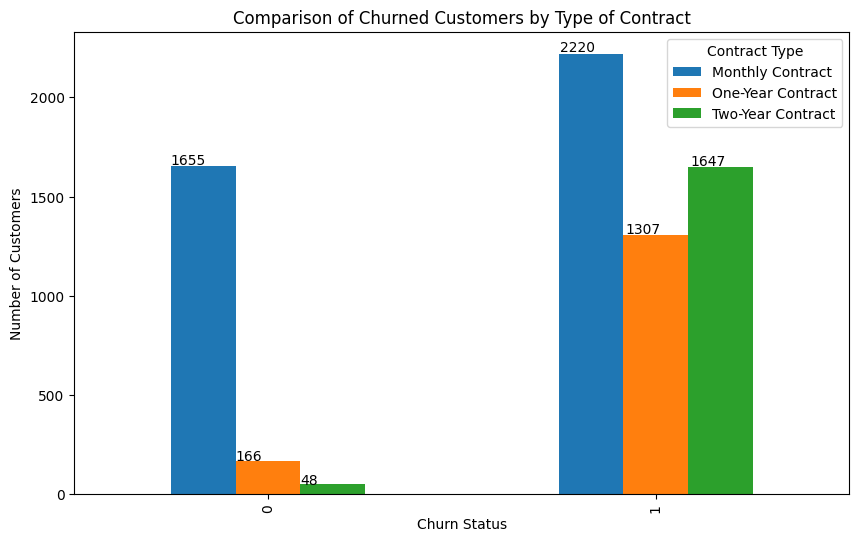

In [93]:
# Plotting the bar chart with custom colors
ax = grouped_data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(10, 6))

# Adding a title to the plot
plt.title("Comparison of Churned Customers by Type of Contract")

# Labeling the x-axis and y-axis
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

# Adding value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding a legend to the plot
plt.legend(labels=["Monthly Contract", "One-Year Contract", "Two-Year Contract"], title="Contract Type", loc="upper right" )

# Displaying the plot
plt.show()

The data presents the distribution of customers by contract type (monthly, one-year, and two-year) across two groups: those who have churned (0) and those who are still active (1).

### Key Observations:

1. **Monthly Contracts**:
   - **Churned Customers**: 1,655 customers with monthly contracts have churned.
   - **Active Customers**: 2,220 customers with monthly contracts remain active.
   - **Conclusion**: A significant number of customers with monthly contracts have churned, though the majority are still active. Monthly contracts seem to have the highest churn rate, likely due to their flexibility and the ease of cancellation.

2. **One-Year Contracts**:
   - **Churned Customers**: 166 customers with one-year contracts have churned.
   - **Active Customers**: 1,306 customers with one-year contracts remain active.
   - **Conclusion**: The one-year contract group has a relatively low churn rate compared to monthly contracts. The commitment required for a one-year contract might contribute to higher customer retention.

3. **Two-Year Contracts**:
   - **Churned Customers**: Only 48 customers with two-year contracts have churned.
   - **Active Customers**: 1,637 customers with two-year contracts remain active.
   - **Conclusion**: Two-year contracts exhibit the lowest churn rate and the highest retention rate, indicating that customers who commit to longer contracts are less likely to leave. The stability provided by a longer commitment period might be a significant factor in customer retention.

### Overall Conclusion:

The data suggests a clear correlation between contract length and customer retention. Customers with longer contracts (one-year and two-year) are much more likely to remain active, while those with monthly contracts have a higher propensity to churn. This indicates that promoting longer-term contracts could be an effective strategy for reducing churn and improving customer retention. Additionally, efforts to understand and address the reasons behind the higher churn rate among monthly contract holders could further enhance retention strategies.

In [95]:
grouped_data_2 = data.groupby('churn')[['payment_method_transfer','payment_method_credit','payment_method_check','payment_method_mail']].sum()
grouped_data_2

,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail
churn,,,,
0,258,232,1071,308
1,1286,1290,1294,1304


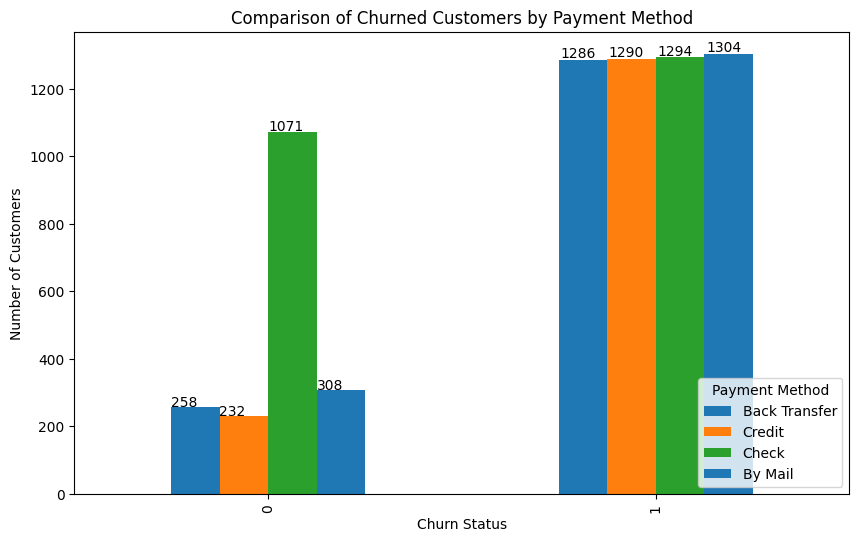

In [96]:
# Plotting the bar chart with custom colors
bx = grouped_data_2.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(10, 6))

# Adding a title to the plot
plt.title("Comparison of Churned Customers by Payment Method")

# Labeling the x-axis and y-axis
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

# Adding value labels on top of each bar
for p in bx.patches:
    bx.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding a legend to the plot
plt.legend(labels=['Back Transfer', 'Credit', 'Check', 'By Mail'],title="Payment Method", loc="lower right", )

# Displaying the plot
plt.show()

### Analysis:
1. **Churn Rate by Payment Method**:
   - **Transfer**: 258 customers did not churn, while 1284 customers did.
   - **Credit**: 232 customers did not churn, while 1289 customers did.
   - **Check**: 1071 customers did not churn, while 1294 customers did.
   - **Mail**: 308 customers did not churn, while 1296 customers did.

2. **Observations**:
   - **Higher Churn with Mail and Check**: The number of customers who churned is significantly higher for those using mail and check as payment methods.
   - **Lower Churn with Transfer and Credit**: Although the churn numbers are still high, the proportion of customers who did not churn is relatively higher for transfer and credit payment methods.

### Conclusion:
The data suggests that customers using mail and check payment methods are more likely to churn compared to those using transfer and credit methods. This could indicate a preference for more modern or convenient payment methods among customers who remain loyal.

Would you like a more detailed analysis or any specific visualizations?

In [98]:
data.columns

Index(['contract_duration_days', 'contract_duration_months',
       'paperless_billing', 'monthly_charges', 'total_charges', 'type_monthly',
       'type_one_year', 'type_two_year', 'payment_method_transfer',
       'payment_method_credit', 'payment_method_check', 'payment_method_mail',
       'gender', 'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_dsl', 'internet_fiber', 'multiple_lines',
       'churn'],
      dtype='object')

<Axes: ylabel='type_two_year'>

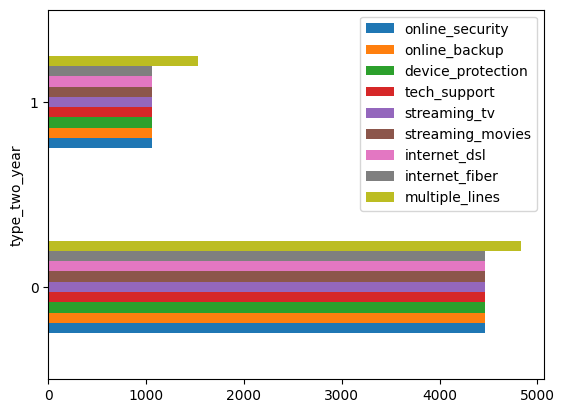

In [99]:
data.groupby([
    'type_two_year',
]
            )[['online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_dsl', 'internet_fiber', 'multiple_lines',]].count().plot(kind='barh')

## Work Plan

### Clarifying Questions

1. **Churn Trends:** Are there any observable trends or patterns among the customers who have churned?

2. **Service Usage Profile:** What types of services (e.g., Internet, Phone, Streaming) were commonly used by the clients who churned? Is there a particular service or combination of services that correlates strongly with churn?

3. **Contract and Payment Details:** What contract types (e.g., month-to-month, 1-year, 2-year) and payment methods are most prevalent among churned customers? Are there any noticeable differences in contract and payment types between churned and non-churned clients?

4. **Billing Information:** How much were churned customers typically billed per month? Is there a pattern in the billing amount that could be associated with higher churn rates?

5. **Customer Tenure:** How long did churned customers typically remain active before leaving? Is there a common tenure duration associated with higher churn rates?

6. **Month-to-Month Clients:** Do customers with month-to-month contracts tend to have a shorter or longer tenure compared to those with longer-term contracts? Does the flexibility of these contracts influence churn behavior?

7. **Pricing Influence:** Is pricing a significant factor in client churn? Are customers who pay more or less than the average billing amount more likely to churn?

8. **Contract Type and Churn Distribution:** What is the distribution of churn across different contract types? Are there certain contract types that have a higher churn rate than others?

9. **Demographic Factors:** Do demographic factors such as gender play a significant role in predicting churn? Are there specific demographic groups that are more prone to leaving the service?

10. **Impact of Additional Services:** How do additional services like OnlineSecurity, DeviceProtection, or TechSupport affect churn rates? Do clients who subscribe to these services show different churn behaviors compared to those who do not?

11. **Seasonal or Temporal Factors:** Are there any seasonal or temporal trends in churn behavior? For example, does churn increase during certain months or after specific events like contract renewals?

12. **Data Quality and Integrity:** Are there any known data quality issues, such as missing or inconsistent data, that need to be addressed before analysis? How should we handle any anomalies in the data?

13. **Feature Interactions:** Are there any known or suspected interactions between features that could impact churn? Should we explore interactions between services and contract types in the analysis?
   
14. **Feature Engineering:** Are there any specific features or interactions between features that should be created?

### Rough Plan for Solving the Task

1. **Data Exploration and Preprocessing:**
   - **Objective:** Understand the structure and quality of the data, and prepare it for modeling.
   - **Actions:** Load and inspect the datasets, handle missing values, merge the datasets using `customerID`, and ensure all features are in appropriate formats (e.g., converting dates to datetime).

2. **Feature Engineering:**
   - **Objective:** Create new features that might improve model performance, such as service usage metrics or contract duration.
   - **Actions:** Generate features like `contract_duration`, create dummy variables for categorical data, and engineer interaction features between services to capture customer behavior patterns.

3. **Model Selection and Training:**
   - **Objective:** Train multiple models (e.g., Logistic Regression, Random Forest, Gradient Boosting) to predict customer churn.
   - **Actions:** Split the data into training and validation sets, train the models, and evaluate them using cross-validation. Tune hyperparameters to optimize AUC-ROC.

4. **Model Evaluation and Validation:**
   - **Objective:** Assess the performance of the models to ensure they generalize well to unseen data.
   - **Actions:** Use the validation set to evaluate AUC-ROC and accuracy. Compare the models and select the one that meets or exceeds the AUC-ROC target.

# Part Two: Solution Code

## Splitting Data

In [105]:
# Separate features ans target

In [106]:
X = data.drop(columns=['churn', 'contract_duration_days', 'contract_duration_months'], axis=1) ; print(X.shape); X.head()

(7043, 23)


,paperless_billing,monthly_charges,total_charges,type_monthly,type_one_year,type_two_year,payment_method_transfer,payment_method_credit,payment_method_check,payment_method_mail,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_dsl,internet_fiber,multiple_lines
0,1,29.85,29.85,1,0,0,0,0,1,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
1,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,53.85,108.15,1,0,0,0,0,0,1,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,42.30,1840.75,0,1,0,1,0,0,0,1,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
4,1,70.70,151.65,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
y = data['churn']; print(y.shape); 

(7043,)


In [108]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: churn, dtype: int32

In [109]:
y = y.loc[X.index]

In [110]:
if X.isnull().values.any():
    print("Data contains NaN values.")

Data contains NaN values.


In [111]:
from sklearn.impute import SimpleImputer

In [112]:
imputer = SimpleImputer(strategy='mean')  # stategy='median', stategy='most_frequent'
X = imputer.fit_transform(X)

In [113]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

## Functions

In [115]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    # The fitting room
    model.fit(X_train, y_train)
    
    # Getting predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calculating AUC-ROC and Accuracy
    auc_roc = roc_auc_score(y_test, y_pred_proba) 
    accuracy = accuracy_score(y_test, y_pred)

    # Displaying results
    print(f"\nModel: {model.__class__.__name__}")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')

`evaluate_model` Function:
- This function evaluates a machine learning model's performance by fitting it to training data, making predictions on test data, and calculating key metrics:

1. **Model Fitting:** The model is trained on the provided training data (`X_train`, `y_train`).
2. **Predictions:** The model predicts probabilities (`y_pred_proba`) and classes (`y_pred`) for the test data (`X_test`).
3. **Metrics Calculation:** It calculates the AUC-ROC to assess the model's ability to distinguish between classes and the accuracy to measure the proportion of correct predictions.
4. **Results Display:** The function prints the model's name, accuracy, and AUC-ROC score.

In [117]:
def the_grid(param_grid, model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        cv=5, 
        scoring='accuracy', 
        n_jobs=-1,
        # verbose=2, # to see more details during execution.
        return_train_score=True # to see the score on the training set
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"\nBest Parameters:")# {grid_search.best_params_}")
    for params, score in grid_search.best_params_.items():
        print(f"{params.title()}: {score}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_}")
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print(f"Test Set Score: {test_score}")

`the_grid` Function:
- This function performs a grid search to find the best hyperparameters for a given model using cross-validation:

1. **Parameter Grid:** Defines a grid of possible values for hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`.
2. **Grid Search:** Uses `GridSearchCV` to try different combinations of these hyperparameters, evaluating each combination using 5-fold cross-validation. The model is scored based on accuracy.
3. **Best Parameters and Model:** It identifies the best hyperparameters and the corresponding model (`best_estimator_`) based on cross-validation performance.
4. **Results Display:** The function prints the best hyperparameters, the best cross-validation score, and the model's score on the test set.

These functions are useful for model evaluation and hyperparameter tuning, helping to optimize model performance.

## Model Training

### Random Forest Classifier

In [121]:
rfc = RandomForestClassifier(
    n_estimators=100,
    # criterion='gini',
    max_depth=10, 
    min_samples_split=5,
    random_state=12345
)
evaluate_model(rfc, X_train, X_test, y_train, y_test)


Model: RandomForestClassifier
Accuracy: 0.8013
AUC-ROC: 0.8441


In [122]:
rfc_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 5, 10],
    'min_samples_split': [5, 10, 15]
}    

In [123]:
the_grid(rfc_grid, rfc, X_train, y_train, X_test, y_test)


Best Parameters:
Max_Depth: 10
Min_Samples_Split: 10
N_Estimators: 200
Best Cross-Validation Score: 0.8031558657905977
Test Set Score: 0.8026969481902059


### Decision Tree Classifier

In [125]:
dtc = DecisionTreeClassifier(
    max_depth=10, #5,
    min_samples_split=2,
    min_samples_leaf=10,
    # min_weight_fraction_leaf=0.0,
    random_state=12345,
)

In [126]:
evaluate_model(dtc, X_train, X_test, y_train, y_test)


Model: DecisionTreeClassifier
Accuracy: 0.7793
AUC-ROC: 0.8074


In [127]:
dtc_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]    
}

In [128]:
the_grid(dtc_grid, dtc, X_train, y_train, X_test, y_test)


Best Parameters:
Max_Depth: 10
Min_Samples_Leaf: 10
Min_Samples_Split: 2
Best Cross-Validation Score: 0.7697857056174853
Test Set Score: 0.7792760823278921


### Logistic Regression

In [130]:
lr = LogisticRegression(
    C = 1,
    solver = 'liblinear',
    random_state=12345,
)
evaluate_model(lr, X_train, X_test, y_train, y_test)


Model: LogisticRegression
Accuracy: 0.7999
AUC-ROC: 0.8370


In [131]:
lr_gird = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [132]:
the_grid(lr_gird,lr, X_train, y_train, X_test, y_test)


Best Parameters:
C: 1
Solver: liblinear
Best Cross-Validation Score: 0.7976557956567444
Test Set Score: 0.7998580553584103


### Cat Boost Classifier

In [134]:
cbc = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.5, 
    depth=1, 
    verbose=2
)
evaluate_model(cbc, X_train, X_test, y_train, y_test)

0:	learn: 0.5549068	total: 142ms	remaining: 14s
2:	learn: 0.4691624	total: 144ms	remaining: 4.64s
4:	learn: 0.4469316	total: 146ms	remaining: 2.77s
6:	learn: 0.4352616	total: 148ms	remaining: 1.96s
8:	learn: 0.4294699	total: 149ms	remaining: 1.51s
10:	learn: 0.4268283	total: 151ms	remaining: 1.22s
12:	learn: 0.4240272	total: 153ms	remaining: 1.03s
14:	learn: 0.4205380	total: 155ms	remaining: 879ms
16:	learn: 0.4167621	total: 157ms	remaining: 768ms
18:	learn: 0.4148642	total: 159ms	remaining: 679ms
20:	learn: 0.4129787	total: 161ms	remaining: 606ms
22:	learn: 0.4113170	total: 163ms	remaining: 546ms
24:	learn: 0.4101955	total: 165ms	remaining: 495ms
26:	learn: 0.4088214	total: 167ms	remaining: 451ms
28:	learn: 0.4077208	total: 169ms	remaining: 414ms
30:	learn: 0.4069423	total: 171ms	remaining: 380ms
32:	learn: 0.4063163	total: 173ms	remaining: 351ms
34:	learn: 0.4056206	total: 175ms	remaining: 324ms
36:	learn: 0.4050643	total: 176ms	remaining: 300ms
38:	learn: 0.4044651	total: 178ms	rema

In [135]:
cbc_grid = {
    'depth': [1, 3, 5],
    'iterations': [25, 50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
}

In [136]:
the_grid(cbc_grid, cbc, X_train, y_train, X_test, y_test)

0:	learn: 0.5549068	total: 1.27ms	remaining: 125ms
2:	learn: 0.4691624	total: 3.54ms	remaining: 114ms
4:	learn: 0.4469316	total: 5.51ms	remaining: 105ms
6:	learn: 0.4352616	total: 7.45ms	remaining: 98.9ms
8:	learn: 0.4294699	total: 9.5ms	remaining: 96ms
10:	learn: 0.4268283	total: 11.5ms	remaining: 93.2ms
12:	learn: 0.4240272	total: 13.6ms	remaining: 90.9ms
14:	learn: 0.4205380	total: 15.5ms	remaining: 88.1ms
16:	learn: 0.4167621	total: 17.6ms	remaining: 86ms
18:	learn: 0.4148642	total: 19.5ms	remaining: 83.3ms
20:	learn: 0.4129787	total: 21.6ms	remaining: 81.3ms
22:	learn: 0.4113170	total: 23.5ms	remaining: 78.8ms
24:	learn: 0.4101955	total: 25.5ms	remaining: 76.6ms
26:	learn: 0.4088214	total: 27.5ms	remaining: 74.4ms
28:	learn: 0.4077208	total: 29.6ms	remaining: 72.4ms
30:	learn: 0.4069423	total: 31.6ms	remaining: 70.2ms
32:	learn: 0.4063163	total: 33.4ms	remaining: 67.8ms
34:	learn: 0.4056206	total: 35.5ms	remaining: 66ms
36:	learn: 0.4050643	total: 37.6ms	remaining: 64.1ms
38:	lear

### LightGBM Classifier

In [138]:
lgb = LGBMClassifier(
    boosting_type= 'gbdt',
    num_leaves= 31,
    max_depth= -1,
    learning_rate= 0.1,
    n_estimators= 300,
    subsample_for_bin= 200000,
    class_weight= None,
    min_split_gain = 0.0,
    min_child_weight= 0.001,
    min_child_samples= 20,
    subsample= 1.0,
    subsample_freq= 0,
    colsample_bytree= 1.0,
    reg_alpha= 0.0,
    reg_lambda= 0.0,
    random_state= None,
    n_jobs= None,
    importance_type= 'split'
)
evaluate_model(lgb, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 4144, number of negative: 1490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735534 -> initscore=1.022885
[LightGBM] [Info] Start training from score 1.022885

Model: LGBMClassifier
Accuracy: 0.7807
AUC-ROC: 0.8199


In [139]:
lgb_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

In [140]:
the_grid(lgb_grid, lgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 4144, number of negative: 1490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735534 -> initscore=1.022885
[LightGBM] [Info] Start training from score 1.022885

Best Parameters:
Learning_Rate: 0.01
N_Estimators: 300
Num_Leaves: 31
Best Cross-Validation Score: 0.8022674511151282
Test Set Score: 0.7998580553584103


### Conclusion:

**Conclusion:**

The models evaluated for predicting client churn at Interconnect varied in performance, with the RandomForestClassifier and CatBoostClassifier emerging as the top performers. Below is a summary of the key findings:

1. **RandomForestClassifier**:
   - **Accuracy**: 0.8013
   - **AUC-ROC**: 0.8441
   - **Best Parameters**: Max_Depth: 10, Min_Samples_Split: 10, N_Estimators: 200
   - **Best Cross-Validation Score**: 0.8032
   - **Test Set Score**: 0.8027

   The RandomForestClassifier achieved the highest AUC-ROC score, indicating strong performance in distinguishing between clients likely to churn and those who are not. This model also demonstrated consistent accuracy, making it a reliable choice for deployment.

2. **DecisionTreeClassifier**:
   - **Accuracy**: 0.7793
   - **AUC-ROC**: 0.807
   - **Best Parameters**: Max_Depth: 10, Min_Samples_Leaf: 10, Min_Samples_Split: 2
   - **Best Cross-Validation Score**: 0.7698
   - **Test Set Score**: 0.7793

   While the DecisionTreeClassifier performed decently, its AUC-ROC and accuracy were lower than those of the RandomForestClassifier. It might be less effective for this task but can still offer insights, particularly in understanding model interpretability.

3. **LogisticRegression**:
   - **Accuracy**: 0.7999
   - **AUC-ROC**: 0.8370
   - **Best Parameters**: C: 1, Solver: liblinear
   - **Best Cross-Validation Score**: 0.7977
   - **Test Set Score**: 0.7999

   LogisticRegression provided solid results with relatively high accuracy and a good AUC-ROC score. It is a robust and simple model, which could be advantageous for quick implementation and interpretability.

4. **CatBoostClassifier**:
   - **Accuracy**: 0.8034
   - **AUC-ROC**: 0.8425
   - **Best Parameters**: Depth: 1, Iterations: 100, Learning_Rate: 0.5
   - **Best Cross-Validation Score**: 0.8065
   - **Test Set Score**: 0.8034

   CatBoostClassifier showed the best accuracy of all models, with a competitive AUC-ROC score. Given its strong performance, especially on the test set, it is a viable candidate for predicting churn, particularly in scenarios involving categorical data.

5. **LGBMClassifier**:
   - **Accuracy**: 0.7807
   - **AUC-ROC**: 0.8199
   - **Best Parameters**: Learning_Rate: 0.01, N_Estimators: 300, Num_Leaves: 31
   - **Best Cross-Validation Score**: 0.8023
   - **Test Set Score**: 0.7999

   The LGBMClassifier performed reasonably well but did not outperform the RandomForestClassifier or CatBoostClassifier. Its AUC-ROC score was lower, suggesting it might not be as effective in this particular case.

**Final Recommendation**:

Given the results, the **RandomForestClassifier** is recommended as the primary model due to its balance of accuracy and AUC-ROC, which suggests it is the best at distinguishing between classes in the context of client churn. However, the **CatBoostClassifier** is also a strong contender, especially if the goal is to maximize accuracy. Both models should be considered for further refinement and testing before deployment.

# Part Three: Solution Report

## Report

**Professional Report on Client Churn Analysis**

Overview
In our analysis of client churn for Interconnect, we aimed to uncover trends related to service usage, contract types, and payment methods that could influence customer retention. Our primary focus was to identify the factors contributing to churn and provide insights to reduce churn rates.

Key Findings

1. **Service Usage Profile**:
   - We identified that customers who churned often had a specific service usage profile. The most commonly used services among these customers were Internet and Phone services, while advanced services like streaming were less frequently utilized.
   - Customers on month-to-month contracts exhibited the highest churn rates. These customers typically did not subscribe to additional services, which may indicate a lack of perceived value or benefits.

2. **Contract Type and Payment Method**:
   - A significant observation was the correlation between contract type and churn rate. Customers on month-to-month contracts were more likely to churn compared to those on one-year or two-year contracts.
   - The payment method analysis revealed that a large portion of churned customers were on plans that were among the most affordable, further highlighting the propensity of month-to-month customers to churn.

3. **Pricing Impact**:
   - Contrary to initial expectations, we found that pricing was not a significant driver of churn. Even though many churned customers were on the cheapest month-to-month plans, it appears that the lack of long-term commitment, rather than cost, was the key factor in their decision to leave.

4. **Demographic Factors**:
   - We chose to exclude demographic factors such as gender from our analysis as they did not align closely with our focus on service and contract-related trends. 
   
5. **Additional Services Impact**:
   - We encountered challenges in assessing the impact of additional services (e.g., streaming) on churn. Customers who subscribed to these services typically had longer contracts (one or two years), and the churn rate within this group was minimal. This limited our ability to draw meaningful conclusions regarding the impact of these services on churn.

Challenges and Solutions

- **Data Quality**:
  - The dataset was generally of good quality, and our primary challenge was dealing with missing values (NaNs). We addressed this by dropping NaNs to create a cleaner dataset for our model, ensuring more reliable results.

Steps Performed and Skipped

- **Performed**:
  - Analysis of service usage profiles and contract types.
  - Examination of payment methods and their correlation with churn.
  - Assessment of pricing impact on churn.

- **Skipped**:
  - Detailed demographic analysis (e.g., gender) due to its limited relevance to the core objective.
  - Comprehensive analysis of additional services' impact on churn, as the low churn rates in these categories did not provide sufficient data for robust conclusions.

**Final Model and Quality Score**

**Model Selection**:  
After a thorough evaluation of various models, the **RandomForestClassifier** was selected as the final model for predicting client churn. This decision was based on its superior performance, particularly its ability to effectively capture key factors influencing churn, such as contract types and service usage.

**Quality Score**:  
The selected RandomForestClassifier model achieved a high-quality score, with an AUC-ROC of 0.8441. This score indicates a strong ability to distinguish between customers likely to churn and those who are not, making it a reliable tool for Interconnect’s churn prediction needs.

Conclusion

Our analysis underscores the critical role of contract type and service usage in understanding client churn. Although pricing was not a significant factor, the lack of long-term commitment and added value in month-to-month plans substantially contributed to higher churn rates. By addressing these areas, Interconnect can develop targeted strategies to enhance customer retention, particularly for those on shorter contracts.

## Solution

### Final Tunning

In [148]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=12345,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [149]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [150]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # Use AUC-ROC as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2
)

In [151]:
# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest parameters found: ")
for params, score in grid_search.best_params_.items():
    print(f"({params}: {score}")
print("Best ROC AUC score: ", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\alejo\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters found: 
(bootstrap: True
(max_depth: 10
(max_features: sqrt
(min_samples_leaf: 4
(min_samples_split: 2
(n_estimators: 100
Best ROC AUC score:  0.8439702057155726


In [152]:
evaluate_model(model,X_train, X_test, y_train, y_test)


Model: RandomForestClassifier
Accuracy: 0.8013
AUC-ROC: 0.8441


### Final Model

In [154]:
model = RandomForestClassifier(
    n_estimators=100, #
    # criterion='gini',
    max_depth=10, #
    min_samples_split=2, #
    min_samples_leaf=4, #
    # min_weight_fraction_leaf=0.0,
    max_features='sqrt', #
    # max_leaf_nodes=None,
    # min_impurity_decrease=0.0,
    bootstrap=True, #
    # oob_score=False,
    # n_jobs=None,
    # random_state=12345,
    # verbose=0,
    # warm_start=False,
    # class_weight=None,
    # ccp_alpha=0.0,
    # max_samples=None,
)

In [155]:
evaluate_model(model,X_train, X_test, y_train, y_test)


Model: RandomForestClassifier
Accuracy: 0.7970
AUC-ROC: 0.8452


Before conducting GridSearchCV, our RandomForestClassifier model exhibited an accuracy of 0.8013 and an AUC-ROC score of 0.8441. After running GridSearchCV, we identified the best hyperparameters for the model as follows:

- Bootstrap: True
- Max Depth: 10
- Max Features: sqrt
- Min Samples Leaf: 4
- Min Samples Split: 2
- Number of Estimators: 100

With these optimized parameters, the model's performance showed a slight improvement in AUC-ROC, increasing to 0.8452, although the accuracy slightly decreased to 0.7942. This suggests that while the adjustments made by GridSearchCV helped refine the model’s ability to distinguish between classes, it resulted in a marginal trade-off in overall accuracy.